In [75]:
%load_ext autoreload
%autoreload 2

import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.append(base_path)

import deepdoctection as dd
from meri.layout.pipeline_components import (AddPDFInfoComponent, 
                        DummyDetectorComponent, 
                        LayoutDetectorComponent,
                        OCRComponent,
                        DrawingsDetectorComponent,
                        ImageDetectorComponent,
                        TableDetectorComponent,
                        WordUnionComponent,
                        NMSComponent,
                        TextDetectorComponent)
from meri.layout.pipeline import Pipeline
from meri.layout.pipeline_components.utils import ProcessingService, CONFIGS_PATH

from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
pdf_path = f'{base_path}/demo/data/Alfa Laval LKH.pdf'

### Build pipeline

In [63]:
pipeline_config_path = os.path.abspath(os.path.join(CONFIGS_PATH, 'good_pipeline.yaml'))
print(pipeline_config_path)
pipeline = Pipeline.from_config(cfg_path=pipeline_config_path)
pipeline.build()

[0522 11:13.51 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/layout/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


/workspaces/meri/meri/layout/config/good_pipeline.yaml
Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['table', 'figure'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0522 11:13.52 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0522 11:13.52 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
You are using a model of type table-transformer to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
[0522 11:13.52 @_builder.py:187]  INF  Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[0522 11:13.52 @_hub.py:180]  INF  [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
[0522 11:13.52 @_builder.py:245]  INF  Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.


Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': None,
                   'WEIGHTS': 'microsoft/table-transformer-detection/pytorch_model.bin'}}}>


Some weights of the model checkpoint at /root/.cache/deepdoctection/weights/microsoft/table-transformer-detection/pytorch_model.bin were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/root/miniconda3/envs/layout_analysis/lib/python3.12/site-p

Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['text', 'title', 'list', 'table'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0522 11:13.53 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0522 11:13.53 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...


Building pipeline from components:  [<meri.layout.pipeline_components.add_pdf_info_component.AddPDFInfoComponent object at 0x7f98ffe29b50>, <meri.layout.pipeline_components.image_detector_component.ImageDetectorComponent object at 0x7f98fc425880>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7f98fc424cb0>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7f98fffa9430>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7f98fc42c560>, <meri.layout.pipeline_components.nms_component.NMSComponent object at 0x7f990440d640>, <meri.layout.pipeline_components.ocr_component.OCRComponent object at 0x7f98fc2414c0>, <meri.layout.pipeline_components.word_union_component.WordUnionComponent object at 0x7f98fc2fea50>]


### Run pipeline

In [73]:
dps, page_dicts = pipeline.run(pdf_path)

[0522 11:16.26 @doctectionpipe.py:84]  INF  Processing Alfa Laval LKH_0.pdf
[0522 11:16.27 @context.py:126]  INF  AddPDFInfoComponent total: 0.1111 sec.
[0522 11:16.27 @context.py:126]  INF  ImageDetectorComponent total: 0.0322 sec.
/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[0522 11:16.32 @context.py:126]  INF  LayoutDetectorComponent total: 4.3666 sec.
[0522 11:16.32 @context.py:126]  INF  LayoutDetectorComponent total: 0.1804 sec.
[0522 11:16.32 @context.py:126]  INF  LayoutDetectorComponent total: 0.1182 sec.
[0522 11:16.32 @context.py:126]  INF  NMSComponent total: 0.0016 sec.
[0522 11:16.33 @context.py:126]  INF  OCRComponent total: 1.5032 sec.


### Visualize layout

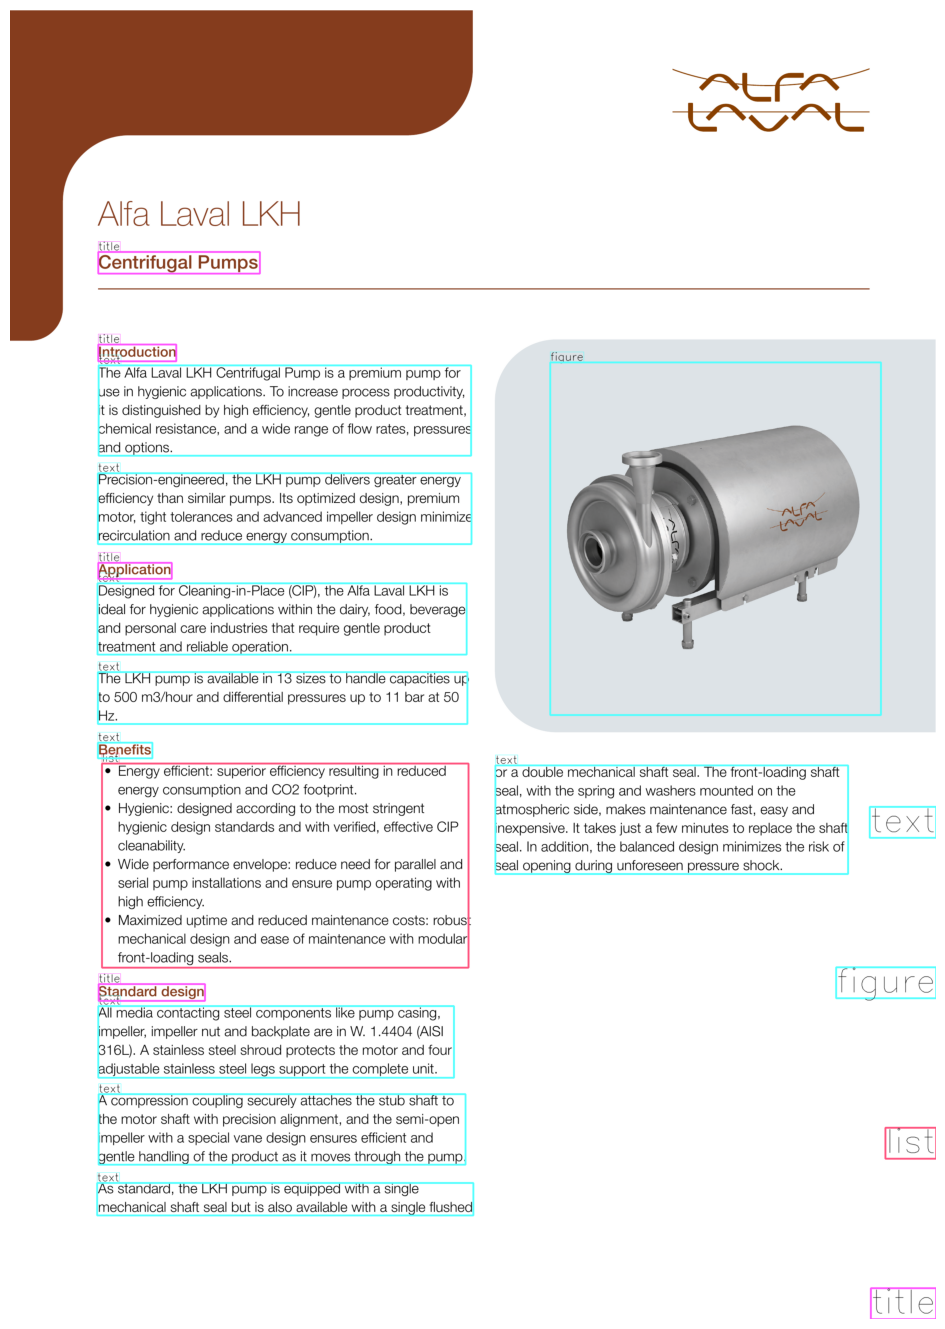

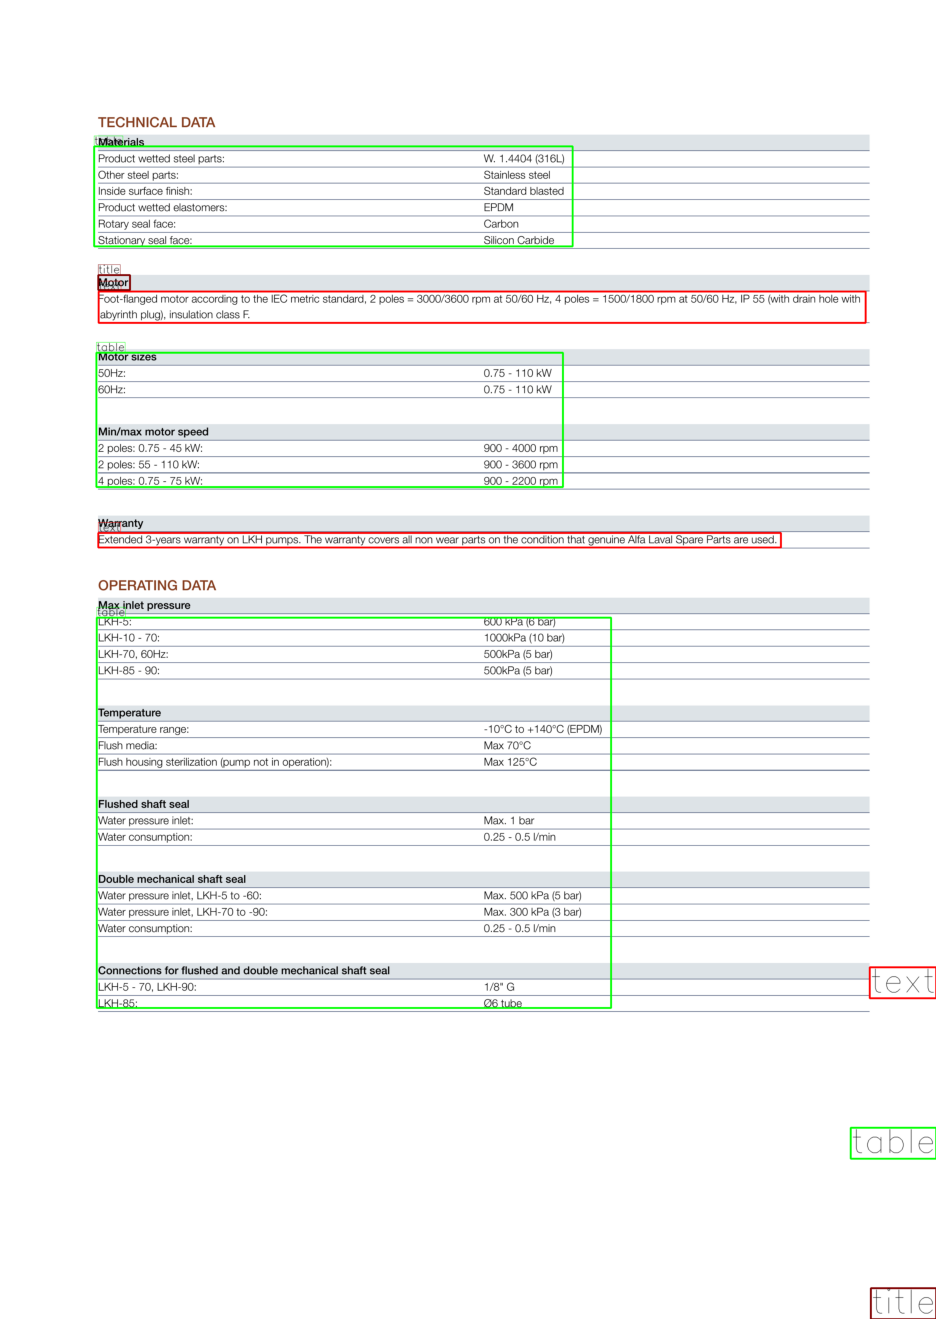

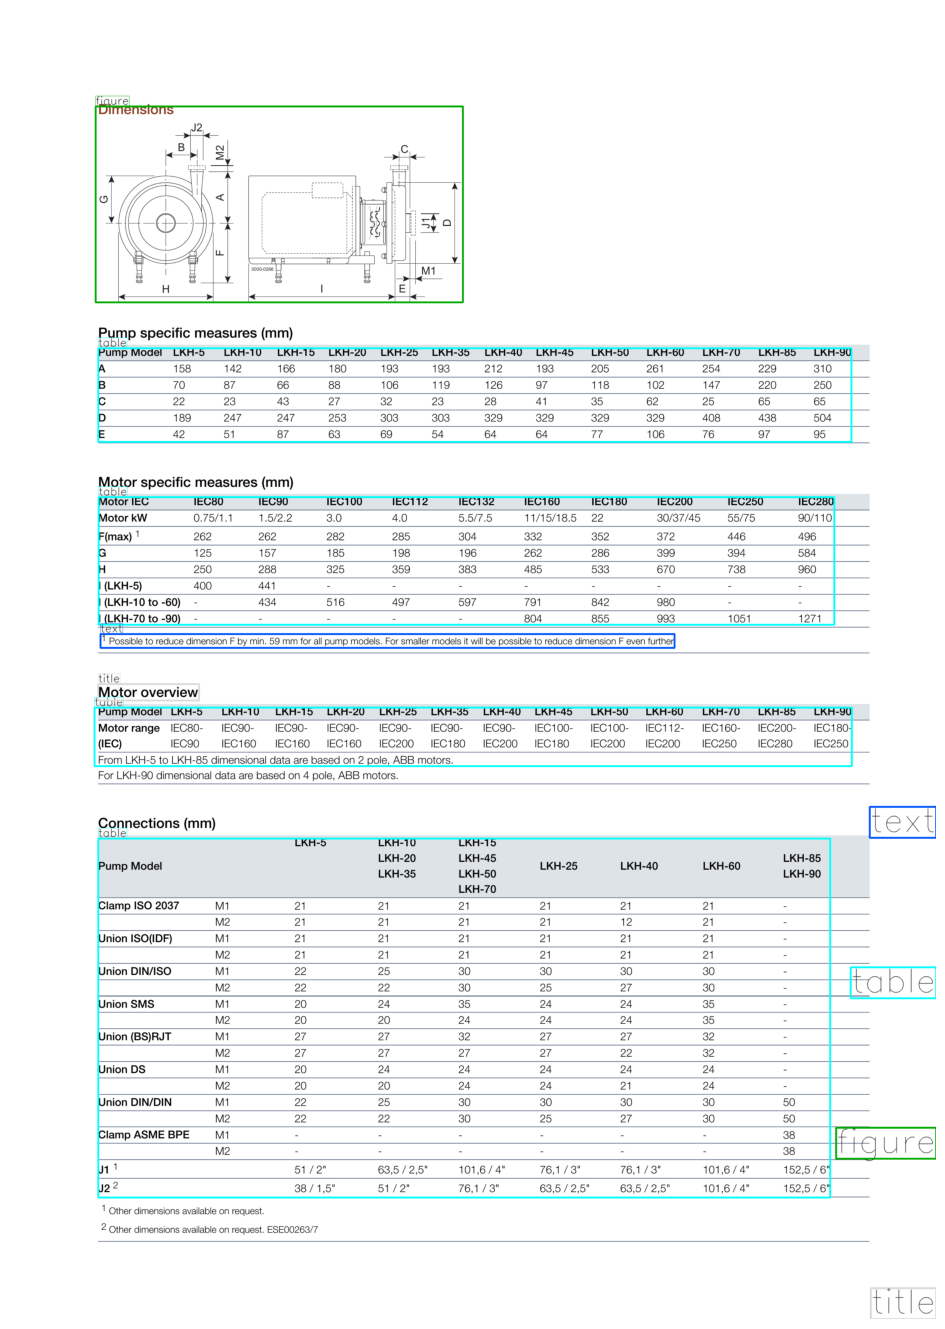

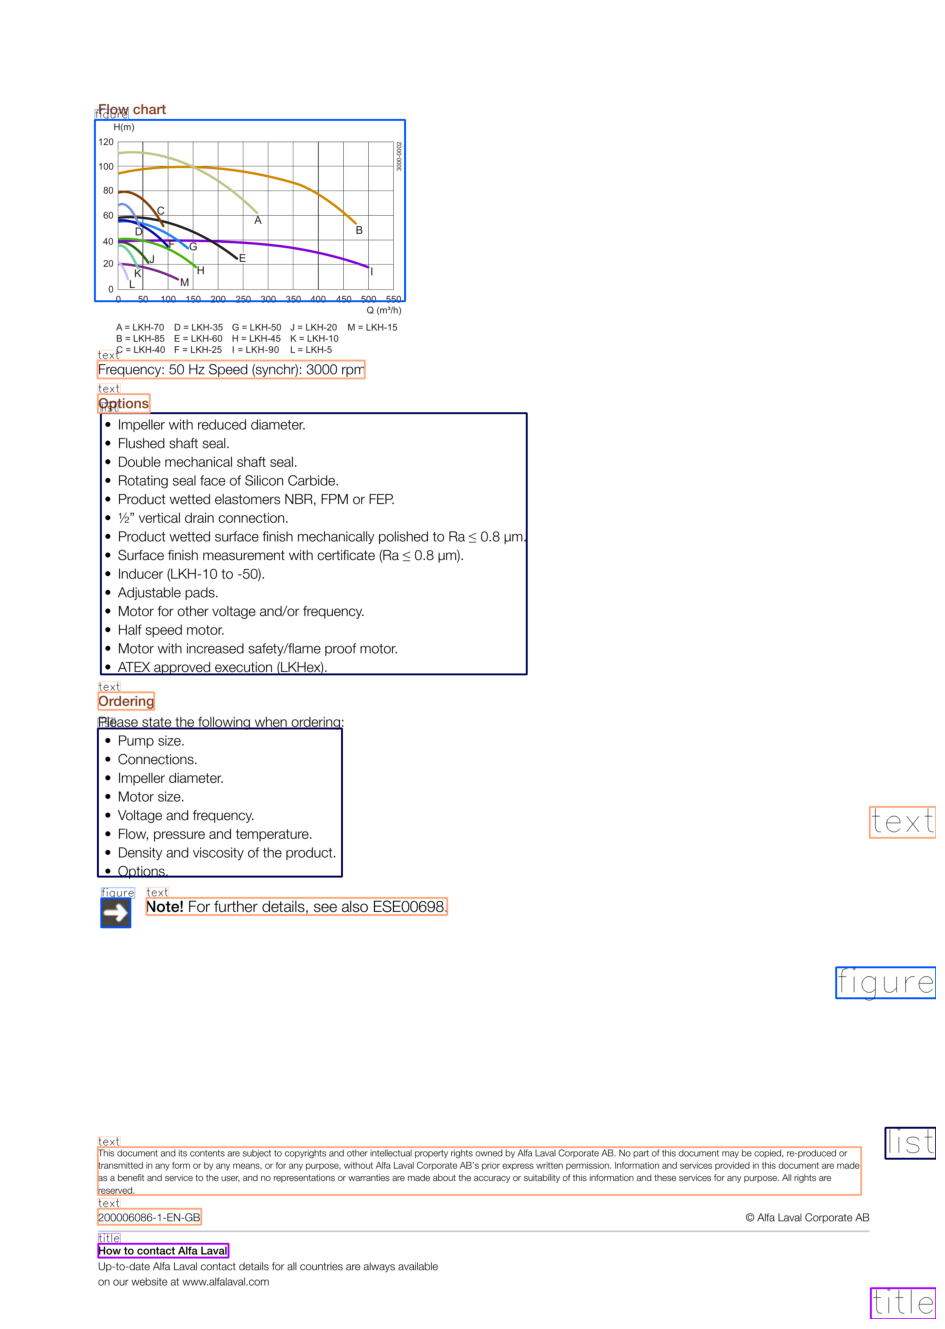

In [74]:
for dp in dps:
    image = dp.viz(show_words=False, show_tables=True)
    plt.figure(figsize = (25,17))
    plt.axis('off')
    plt.imshow(image)